# Titanic Classification

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [42]:
titanic_data = pd.read_csv('tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
missing_values = titanic_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Visualize missing values

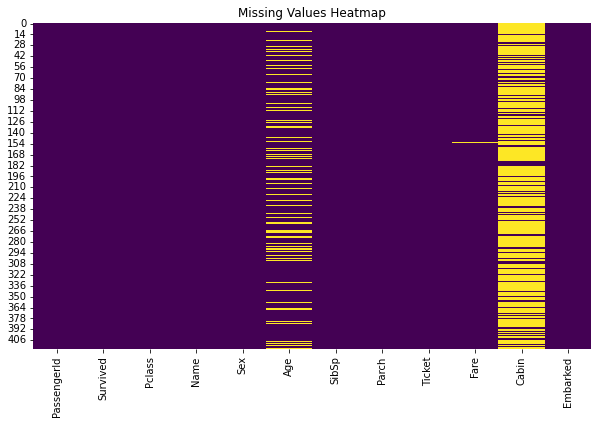

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Explore survival distribution

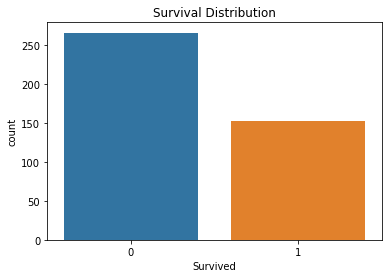

In [45]:
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')
plt.show()

### Explore survival by Pclass

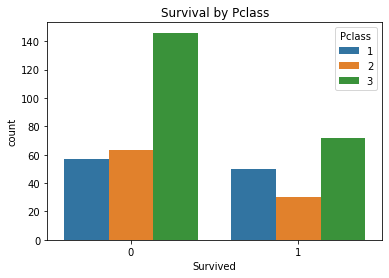

In [46]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival by Pclass')
plt.show()

### Explore age distribution

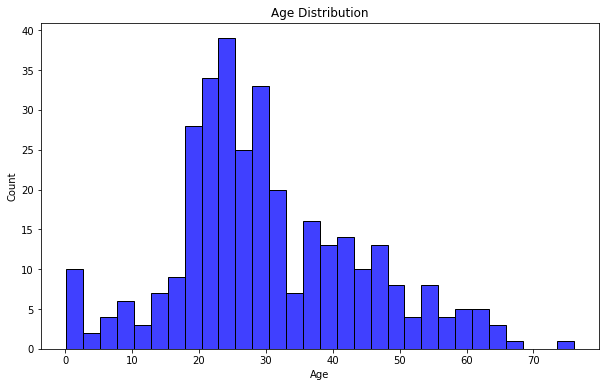

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False, color='blue')
plt.title('Age Distribution')
plt.show()

## Data Preprocessing

In [48]:
# Drop columns that are not useful for prediction
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values in the 'Age' column with the mean age
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

# Fill missing values in the 'Embarked' column with the most frequent value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [50]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### Convert categorical columns to numerical using Label Encoding

In [51]:
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

In [52]:
missing_values_after_preprocessing = titanic_data.isnull().sum()
print("Missing Values After Preprocessing:\n", missing_values_after_preprocessing)

Missing Values After Preprocessing:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [53]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [54]:
# Create feature matrix X and target variable y
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classification

### Model training

In [56]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Make predictions on the test set

In [57]:
y_pred = clf.predict(X_test)

## Evaluate the model

In [58]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [59]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Visualisation

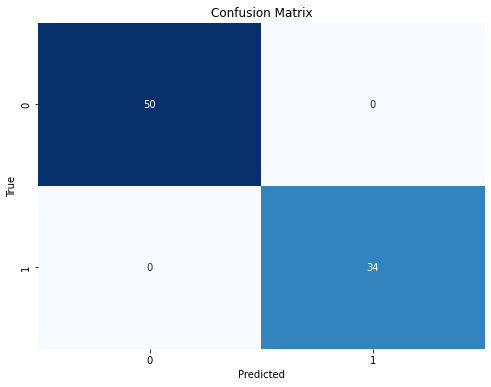

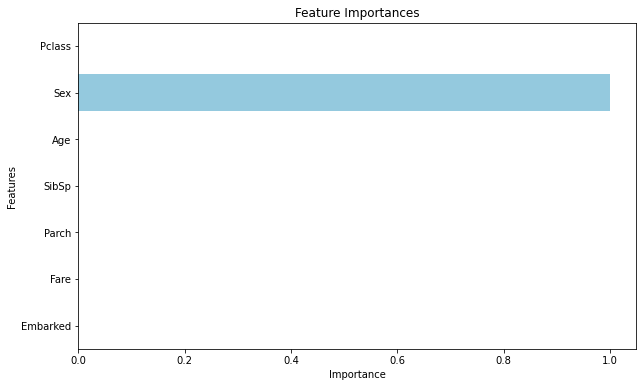

In [60]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize Feature Importances
feature_importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, orient='h', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
